In [62]:
import json
import pandas as pd

with open("appl_day_price(deprecated).json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data['data'])

df

,id,type,attributes,relationships
0,3699740724,historical_price,"{'open': 7.6225, 'close': 7.643214, 'high': 7....","{'ticker': {'data': {'id': '146', 'type': 'tic..."
1,3699740725,historical_price,"{'open': 7.665, 'close': 7.656429, 'high': 7.6...","{'ticker': {'data': {'id': '146', 'type': 'tic..."
2,3699740726,historical_price,"{'open': 7.656429, 'close': 7.534643, 'high': ...","{'ticker': {'data': {'id': '146', 'type': 'tic..."
3,3699740727,historical_price,"{'open': 7.5625, 'close': 7.520714, 'high': 7....","{'ticker': {'data': {'id': '146', 'type': 'tic..."
4,3699740728,historical_price,"{'open': 7.510714, 'close': 7.570714, 'high': ...","{'ticker': {'data': {'id': '146', 'type': 'tic..."
...,...,...,...,...
3803,3687149749,historical_price,"{'open': 241.25, 'close': 244.6, 'high': 245.5...","{'ticker': {'data': {'id': '146', 'type': 'tic..."
3804,3740616821,historical_price,"{'open': 244.15, 'close': 244.47, 'high': 245....","{'ticker': {'data': {'id': '146', 'type': 'tic..."
3805,3742128080,historical_price,"{'open': 244.66, 'close': 244.87, 'high': 246....","{'ticker': {'data': {'id': '146', 'type': 'tic..."
3806,3793376646,historical_price,"{'open': 244.94, 'close': 245.83, 'high': 246....","{'ticker': {'data': {'id': '146', 'type': 'tic..."


In [63]:
print(df.iloc[0,2])

{'open': 7.6225, 'close': 7.643214, 'high': 7.660714, 'low': 7.585, 'volume': 493726800.0, 'div_adj_factor': 0.8426209183728206, 'as_of_date': '2010-01-04'}


In [64]:
df['type'].nunique() 

1

In [65]:
print(df.iloc[0,3])

{'ticker': {'data': {'id': '146', 'type': 'ticker'}}}


In [66]:
df_attributes = pd.json_normalize(df["attributes"])

df_relationships = pd.json_normalize(df["relationships"], sep="_")

df_relationships = df_relationships[["ticker_data_id", "ticker_data_type"]].rename(
    columns={"ticker_data_id": "id", "ticker_data_type": "type"}
)

df_final = pd.concat([df['id'],df_attributes, df_relationships], axis=1)

df_final

,id,open,close,high,low,volume,div_adj_factor,as_of_date,id,type
0,3699740724,7.622500,7.643214,7.660714,7.585000,493726800.0,0.842621,2010-01-04,146,ticker
1,3699740725,7.665000,7.656429,7.699643,7.616071,601902000.0,0.842621,2010-01-05,146,ticker
2,3699740726,7.656429,7.534643,7.686786,7.526786,552157200.0,0.842621,2010-01-06,146,ticker
3,3699740727,7.562500,7.520714,7.571429,7.466071,477128400.0,0.842621,2010-01-07,146,ticker
4,3699740728,7.510714,7.570714,7.571429,7.466429,447874000.0,0.842621,2010-01-08,146,ticker
...,...,...,...,...,...,...,...,...,...,...
3803,3687149749,241.250000,244.600000,245.550000,240.990000,40896227.0,1.000000,2025-02-14,146,ticker
3804,3740616821,244.150000,244.470000,245.180000,241.840000,48822491.0,1.000000,2025-02-18,146,ticker
3805,3742128080,244.660000,244.870000,246.010000,243.160400,32204215.0,1.000000,2025-02-19,146,ticker
3806,3793376646,244.940000,245.830000,246.780000,244.290000,32316907.0,1.000000,2025-02-20,146,ticker


In [67]:
df_final.nunique()

id                3808
open              3649
close             3641
high              3642
low               3659
volume            3808
div_adj_factor    3746
as_of_date        3808
id                   1
type                 1
dtype: int64

In [68]:
df_final = pd.concat([df['id'],df_attributes], axis=1)

df_final

,id,open,close,high,low,volume,div_adj_factor,as_of_date
0,3699740724,7.622500,7.643214,7.660714,7.585000,493726800.0,0.842621,2010-01-04
1,3699740725,7.665000,7.656429,7.699643,7.616071,601902000.0,0.842621,2010-01-05
2,3699740726,7.656429,7.534643,7.686786,7.526786,552157200.0,0.842621,2010-01-06
3,3699740727,7.562500,7.520714,7.571429,7.466071,477128400.0,0.842621,2010-01-07
4,3699740728,7.510714,7.570714,7.571429,7.466429,447874000.0,0.842621,2010-01-08
...,...,...,...,...,...,...,...,...
3803,3687149749,241.250000,244.600000,245.550000,240.990000,40896227.0,1.000000,2025-02-14
3804,3740616821,244.150000,244.470000,245.180000,241.840000,48822491.0,1.000000,2025-02-18
3805,3742128080,244.660000,244.870000,246.010000,243.160400,32204215.0,1.000000,2025-02-19
3806,3793376646,244.940000,245.830000,246.780000,244.290000,32316907.0,1.000000,2025-02-20


In [69]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

df_final['as_of_date'] = pd.to_datetime(df_final['as_of_date'])

df_final = df_final.sort_values(by='as_of_date')



In [71]:
df_final[['div_open', 'div_close', 'div_high', 'div_low']] = df_final[["open", "close", "high", "low"]].mul(df_final['div_adj_factor'], axis=0)
df_final

,id,open,close,high,low,volume,div_adj_factor,as_of_date,div_open,div_close,div_high,div_low
0,3699740724,7.622500,7.643214,7.660714,7.585000,493726800.0,0.842621,2010-01-04,6.422878,6.440332,6.455078,6.391280
1,3699740725,7.665000,7.656429,7.699643,7.616071,601902000.0,0.842621,2010-01-05,6.458688,6.451466,6.487879,6.417460
2,3699740726,7.656429,7.534643,7.686786,7.526786,552157200.0,0.842621,2010-01-06,6.451466,6.348847,6.477046,6.342227
3,3699740727,7.562500,7.520714,7.571429,7.466071,477128400.0,0.842621,2010-01-07,6.372321,6.337111,6.379845,6.291068
4,3699740728,7.510714,7.570714,7.571429,7.466429,447874000.0,0.842621,2010-01-08,6.328685,6.379242,6.379844,6.291369
...,...,...,...,...,...,...,...,...,...,...,...,...
3803,3687149749,241.250000,244.600000,245.550000,240.990000,40896227.0,1.000000,2025-02-14,241.250000,244.600000,245.550000,240.990000
3804,3740616821,244.150000,244.470000,245.180000,241.840000,48822491.0,1.000000,2025-02-18,244.150000,244.470000,245.180000,241.840000
3805,3742128080,244.660000,244.870000,246.010000,243.160400,32204215.0,1.000000,2025-02-19,244.660000,244.870000,246.010000,243.160400
3806,3793376646,244.940000,245.830000,246.780000,244.290000,32316907.0,1.000000,2025-02-20,244.940000,245.830000,246.780000,244.290000


In [72]:
log_columns = ["open", "close", "high", "low", "div_open", "div_close", "div_high", "div_low"]

for col in log_columns:
    df_final[f"log_{col}"] = np.log1p(df_final[col])

df_final.head()

,id,open,close,high,low,volume,div_adj_factor,as_of_date,div_open,div_close,div_high,div_low,log_open,log_close,log_high,log_low,log_div_open,log_div_close,log_div_high,log_div_low
0,3699740724,7.622500,7.643214,7.660714,7.585000,493726800.0,0.842621,2010-01-04,6.422878,6.440332,6.455078,6.391280,2.154375,2.156775,2.158797,2.150016,2.004567,2.006915,2.008895,2.000301
1,3699740725,7.665000,7.656429,7.699643,7.616071,601902000.0,0.842621,2010-01-05,6.458688,6.451466,6.487879,6.417460,2.159292,2.158302,2.163282,2.153629,2.009380,2.008411,2.013286,2.003837
2,3699740726,7.656429,7.534643,7.686786,7.526786,552157200.0,0.842621,2010-01-06,6.451466,6.348847,6.477046,6.342227,2.158302,2.144134,2.161803,2.143213,2.008411,1.994543,2.011838,1.993642
3,3699740727,7.562500,7.520714,7.571429,7.466071,477128400.0,0.842621,2010-01-07,6.372321,6.337111,6.379845,6.291068,2.147392,2.142500,2.148434,2.136067,1.997733,1.992945,1.998753,1.986650
4,3699740728,7.510714,7.570714,7.571429,7.466429,447874000.0,0.842621,2010-01-08,6.328685,6.379242,6.379844,6.291369,2.141326,2.148351,2.148434,2.136109,1.991796,1.998671,1.998753,1.986691


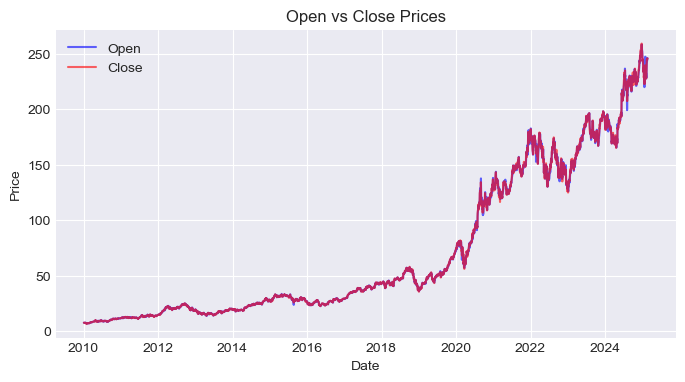

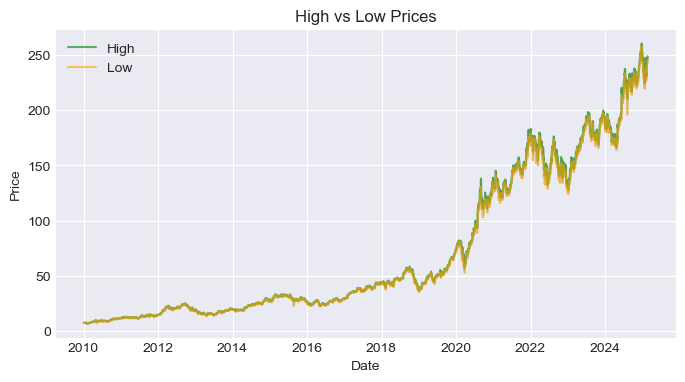

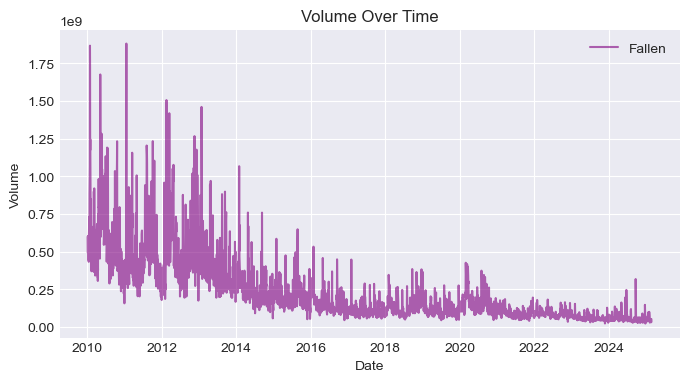

In [73]:
### original
# 选择所需的列
df_ori = df_final[["as_of_date","open", "close", "high", "low", "volume",  "div_adj_factor"]].copy()


plt.style.use("seaborn-v0_8-dark")

plt.figure(figsize=(8, 4))
plt.plot(df_ori["as_of_date"], df_ori["open"], label="Open", color="blue", alpha=0.6)
plt.plot(df_ori["as_of_date"], df_ori["close"], label="Close", color="red", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Open vs Close Prices")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df_ori["as_of_date"], df_ori["high"], label="High", color="green", alpha=0.6)
plt.plot(df_ori["as_of_date"], df_ori["low"], label="Low", color="orange", alpha=0.6)
plt.fill_between(df_ori["as_of_date"], df_ori["high"], df_ori["low"], color="gray", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("High vs Low Prices")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df_ori["as_of_date"], df_ori["volume"], label="Fallen", color="purple", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Volume Over Time")
plt.legend()
plt.grid()
plt.show()

In [74]:
# 计算 80% 分割点
split_idx = int(len(df_ori) * 0.8)

# 划分训练集和测试集
train_df = df_ori.iloc[:split_idx].copy()
test_df = df_ori.iloc[split_idx:].copy()

print(len(train_df))
print(len(test_df))

3046
762


### Brechmark- previous high / same day open

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.metrics import r2_score
# 使用前一天的 High 作为预测值
y_test = df_ori['high']
prev_high_preds = np.roll(y_test, shift=1)  # 向右移动 1 步，模拟前一天的 high
y_test = y_test[-762:]
prev_high_preds = prev_high_preds[-762:]
print(len(y_test),len(prev_high_preds))

# 计算评估指标
mae_prev = mean_absolute_error(y_test, prev_high_preds)
rmse_prev = np.sqrt(mean_squared_error(y_test, prev_high_preds))
mape_prev = np.mean(np.abs((y_test - prev_high_preds) / y_test)) * 100
r2_prev = r2_score(y_test, prev_high_preds)

print(" Benchmark 1: Previous Day High")
print(f"MAE: {mae_prev:.4f}")
print(f"RMSE: {rmse_prev:.4f}")
print(f"MAPE: {mape_prev:.2f}%")
print(f"R² Score: {r2_prev:.4f}")

762 762
 Benchmark 1: Previous Day High
MAE: 2.0034
RMSE: 2.7329
MAPE: 1.13%
R² Score: 0.9923


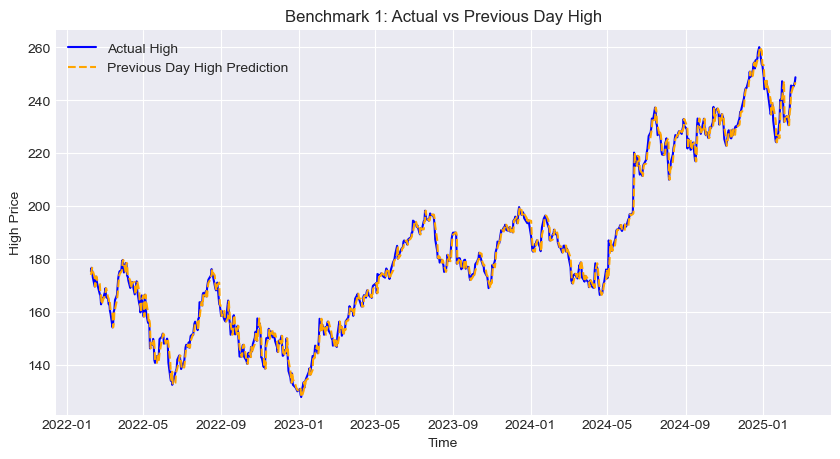

In [79]:
plt.figure(figsize=(10,5))
plt.plot(test_df["as_of_date"],y_test, label="Actual High", color="blue")
plt.plot(test_df["as_of_date"],prev_high_preds, label="Previous Day High Prediction", color="orange", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("High Price")
plt.title("Benchmark 1: Actual vs Previous Day High")
plt.legend()
plt.grid()
plt.show()

In [80]:
# 使用当日的 Open 作为 High 的预测值
same_open_preds = test_df["open"].values[:len(y_test)]  # 确保长度匹配

# 计算评估指标
mae_open = mean_absolute_error(y_test, same_open_preds)
rmse_open = np.sqrt(mean_squared_error(y_test, same_open_preds))
mape_open = np.mean(np.abs((y_test - same_open_preds) / y_test)) * 100
r2_open = r2_score(y_test, same_open_preds)

print(" Benchmark 2: Same Day Open")
print(f"MAE: {mae_open:.4f}")
print(f"RMSE: {rmse_open:.4f}")
print(f"MAPE: {mape_open:.2f}%")
print(f"R² Score: {r2_open:.4f}")

 Benchmark 2: Same Day Open
MAE: 1.9230
RMSE: 2.5660
MAPE: 1.08%
R² Score: 0.9932


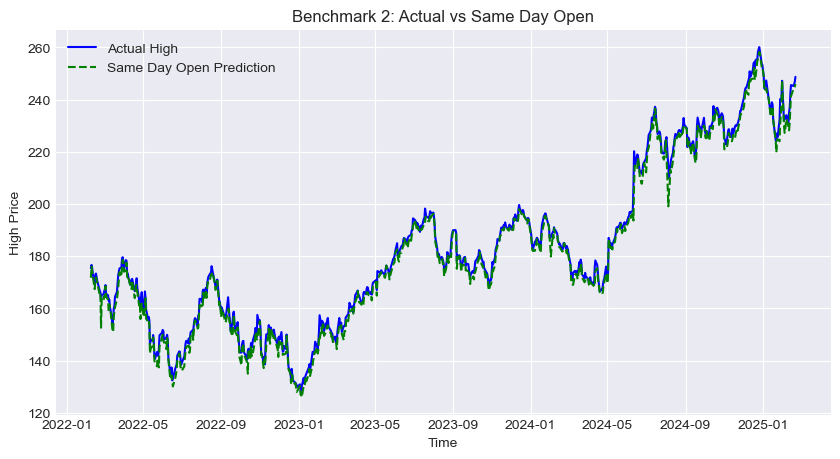

In [82]:
plt.figure(figsize=(10,5))
plt.plot(test_df["as_of_date"],y_test, label="Actual High", color="blue")
plt.plot(test_df["as_of_date"], same_open_preds, label="Same Day Open Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("High Price")
plt.title("Benchmark 2: Actual vs Same Day Open")
plt.legend()
plt.grid()
plt.show()

### Arima

In [14]:
from statsmodels.tsa.arima.model import ARIMA


# 训练 ARIMA 模型 (p, d, q 需要调整)
model = ARIMA(train_df["high"], order=(5,1,0))  # 5阶自回归, 1阶差分, 0阶移动平均
arima_model = model.fit()

# 预测
preds = arima_model.forecast(steps=len(test_df))

mae = mean_absolute_error(test_df["high"], preds)
rmse = np.sqrt(mean_squared_error(test_df["high"], preds))
mape = np.mean(np.abs((test_df["high"] - preds) / test_df["high"])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

r2 = r2_score(test_df["high"], preds)
print(f"R² Score: {r2:.4f}")

print(f"AIC: {arima_model.aic}")
print(f"BIC: {arima_model.bic}")

MAE: 24.874868447986298
RMSE: 32.428440820156545
MAPE: 13.05%
R² Score: -0.0789
AIC: 8448.880308961783
BIC: 8485.007846042647


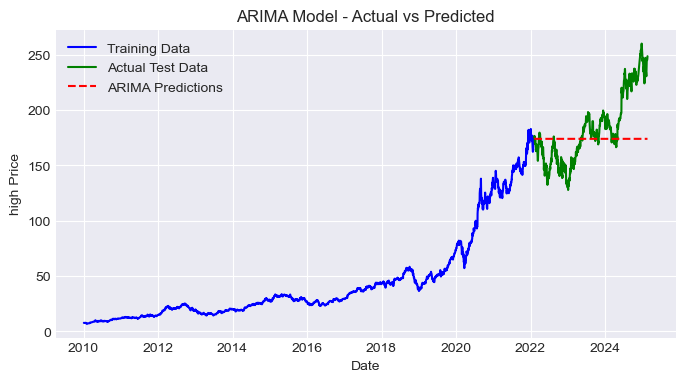

In [15]:
import matplotlib.pyplot as plt

# 画图对比真实值和预测值
plt.figure(figsize=(8,4))
plt.plot(train_df["as_of_date"], train_df["high"], label="Training Data", color="blue")
plt.plot(test_df["as_of_date"], test_df["high"], label="Actual Test Data", color="green")
plt.plot(test_df["as_of_date"], preds, label="ARIMA Predictions", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("high Price")
plt.title("ARIMA Model - Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

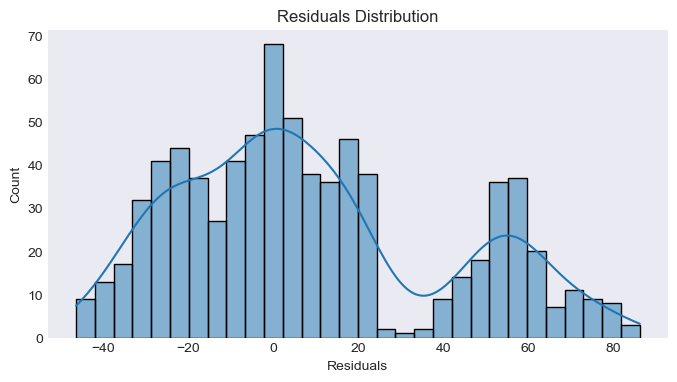

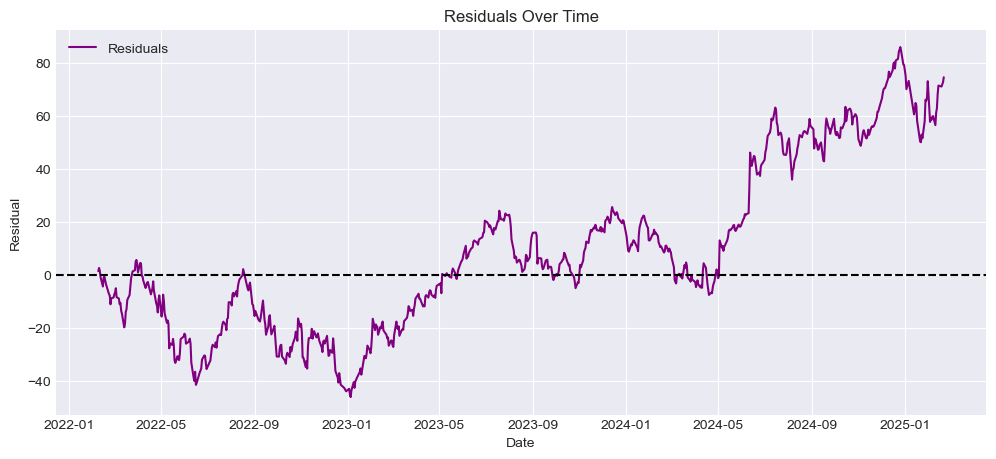

In [16]:
import seaborn as sns

# 计算残差
residuals = test_df["high"] - preds

# 残差分布图
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# 残差随时间变化
plt.figure(figsize=(12,5))
plt.plot(test_df["as_of_date"], residuals, label="Residuals", color="purple")
plt.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.title("Residuals Over Time")
plt.legend()
plt.grid()
plt.show()

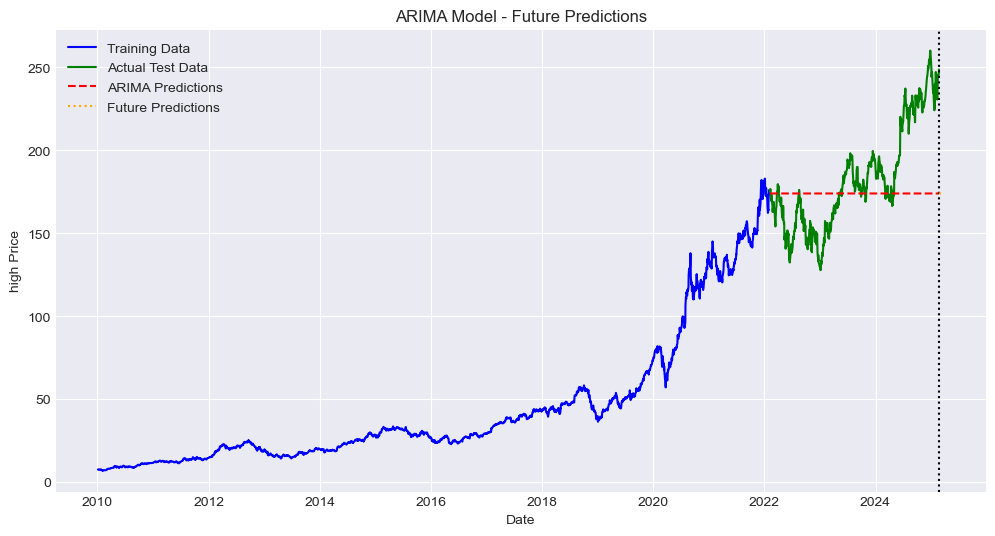

In [17]:
# 预测未来 30 天
future_preds = arima_model.forecast(steps=30)

# 画图
plt.figure(figsize=(12,6))
plt.plot(train_df["as_of_date"], train_df["high"], label="Training Data", color="blue")
plt.plot(test_df["as_of_date"], test_df["high"], label="Actual Test Data", color="green")
plt.plot(test_df["as_of_date"], preds, label="ARIMA Predictions", color="red", linestyle="dashed")
plt.axvline(x=test_df["as_of_date"].iloc[-1], color="black", linestyle="dotted")  # 预测分界线
plt.plot(pd.date_range(test_df["as_of_date"].iloc[-1], periods=30, freq="D"), future_preds, label="Future Predictions", color="orange", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("high Price")
plt.title("ARIMA Model - Future Predictions")
plt.legend()
plt.grid()
plt.show()

# Prophet

In [18]:
from prophet import Prophet

# 创建 Prophet 模型
prophet_model = Prophet()
df_prophet = train_df[["as_of_date", "high"]].rename(columns={"as_of_date": "ds", "high": "y"})

prophet_model.fit(df_prophet)

# 预测
future = prophet_model.make_future_dataframe(periods=len(test_df))
forecast = prophet_model.predict(future)

'''
future = prophet_model.make_future_dataframe(periods=1500)  # 未来365天

future = future[future["ds"].isin(test_df["as_of_date"])]
forecast = prophet_model.predict(future)
'''

23:21:18 - cmdstanpy - INFO - Chain [1] start processing
23:21:19 - cmdstanpy - INFO - Chain [1] done processing


'\nfuture = prophet_model.make_future_dataframe(periods=1500)  # 未来365天\n\nfuture = future[future["ds"].isin(test_df["as_of_date"])]\nforecast = prophet_model.predict(future)\n'

In [19]:
# 1️⃣ 找到 Test 数据的第一个日期
start_date = test_df["as_of_date"].min()

# 2️⃣ 找到 `forecast` 里最接近 start_date 的索引
start_idx = forecast[forecast["ds"] >= start_date].index[0]

# 3️⃣ 取 `len(test_df)` 长度的数据
forecast_test = forecast.iloc[start_idx : start_idx + len(test_df)]

# 4️⃣ 确保 `y_true` 和 `y_pred` 长度一致
y_true = test_df["high"].values[:len(forecast_test)]
y_pred = forecast_test["yhat"].values

#y_true = test_df["high"].values
#y_pred = forecast["yhat"].values

# 5️⃣ 计算误差
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

MAE: 41.170442356462274
RMSE: 44.554528906285626
MAPE: 23.73%


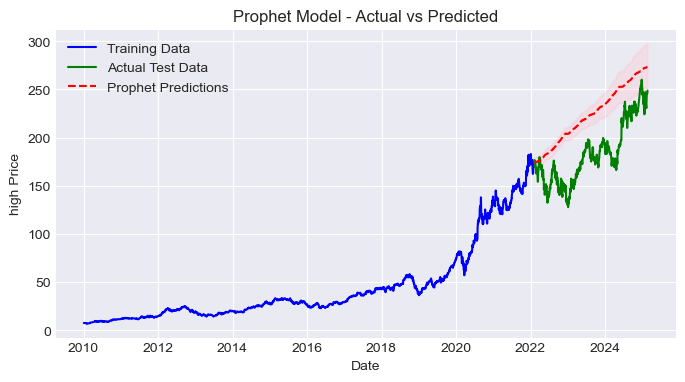

In [20]:
plt.figure(figsize=(8,4))
plt.plot(train_df["as_of_date"], train_df["high"], label="Training Data", color="blue")
plt.plot(test_df["as_of_date"], test_df["high"], label="Actual Test Data", color="green")
plt.plot(test_df["as_of_date"], forecast_test["yhat"], label="Prophet Predictions", color="red", linestyle="dashed")
plt.fill_between(test_df["as_of_date"], forecast_test["yhat_lower"], forecast_test["yhat_upper"], color="pink", alpha=0.3)  # 置信区间
plt.xlabel("Date")
plt.ylabel("high Price")
plt.title("Prophet Model - Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

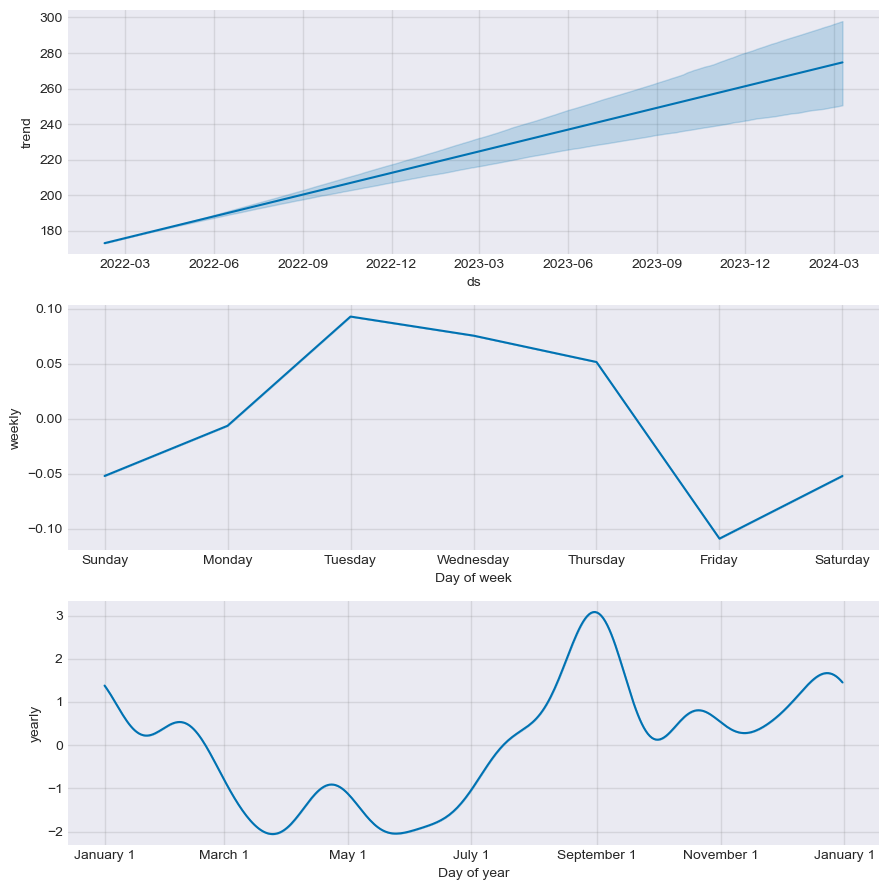

In [21]:
prophet_model.plot_components(forecast_test)
plt.show()

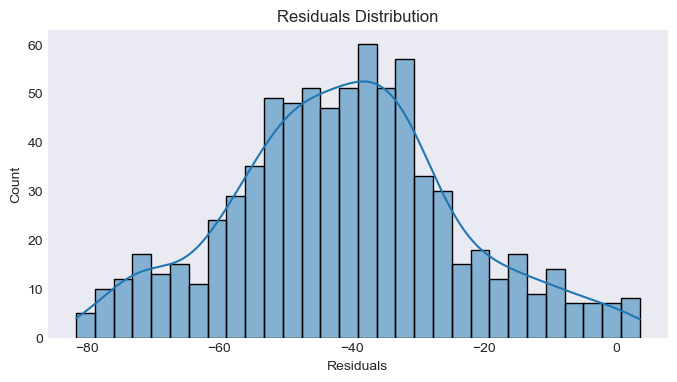

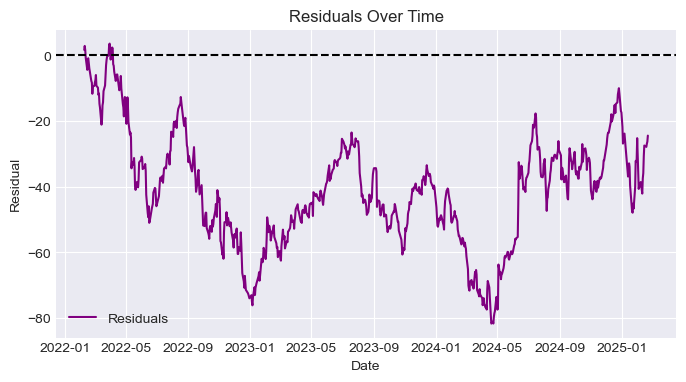

In [22]:
# 计算残差
residuals = y_true - y_pred

# 残差分布图
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# 残差随时间变化
plt.figure(figsize=(8,4))
plt.plot(test_df["as_of_date"], residuals, label="Residuals", color="purple")
plt.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.title("Residuals Over Time")
plt.legend()
plt.grid()
plt.show()

### VAR

In [23]:
from statsmodels.tsa.api import VAR

# 选择多个变量作为输入
var_data = train_df[["open", "close", "high", "low", "volume"]]

# 训练 VAR 模型（自动选择最佳滞后阶数）
model = VAR(var_data)
order = model.select_order(maxlags=10)  # 自动选择最优滞后阶
var_model = model.fit(order.aic)  # 使用 AIC 选择最佳模型

# 预测
preds = var_model.forecast(var_data.values[-order.aic:], steps=len(test_df))

# 转换为 DataFrame
preds_df = pd.DataFrame(preds, columns=["open_pred", "close_pred", "high_pred", "low_pred", "volume_pred"])
print(preds_df.head())

    open_pred  close_pred   high_pred    low_pred   volume_pred
0  172.317625  171.742359  173.681524  170.209425  1.128236e+07
1  171.902160  171.641078  173.705034  170.018296  4.164335e+07
2  171.183049  170.318432  172.574917  168.739822  8.339498e+07
3  170.019224  170.279532  172.515517  168.044253  8.509800e+07
4  170.012491  170.800152  172.693132  168.238986  8.203571e+07


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 确保预测数据的索引匹配测试集
y_true = test_df[["open", "close", "high", "low", "volume"]].values
y_pred = preds  # VAR 预测的结果

# 计算误差
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

MAE: 76146946.90976858
RMSE: 189521565.28168103
MAPE: 184.48%
R² Score: -56.4927


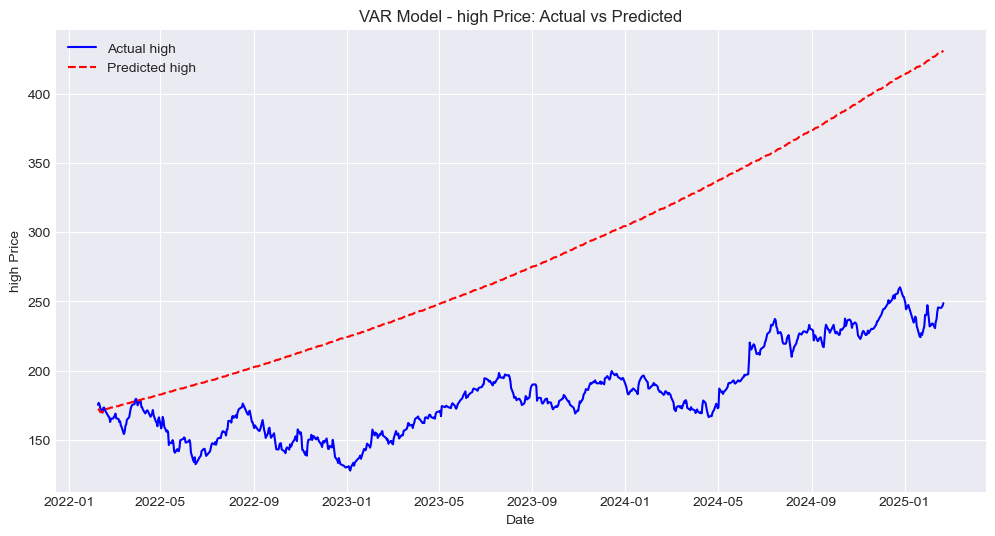

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# 绘制 high 价格
plt.plot(test_df["as_of_date"], test_df["high"], label="Actual high", color="blue")
plt.plot(test_df["as_of_date"], preds[:, 0], label="Predicted high", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("high Price")
plt.title("VAR Model - high Price: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

### SARIMAX

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07189D+00    |proj g|=  4.24490D-01

At iterate    5    f=  9.80839D-01    |proj g|=  8.55945D-02

At iterate   10    f=  9.71945D-01    |proj g|=  1.60830D-03

At iterate   15    f=  9.71942D-01    |proj g|=  2.28085D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     18      1     0     0   2.281D-05   9.719D-01
  F =  0.97194190459207297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


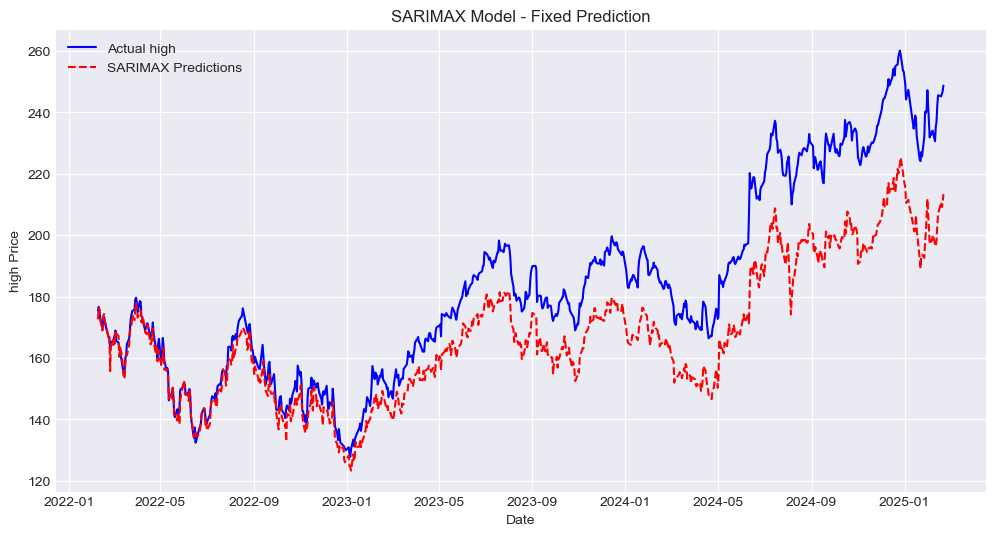

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 目标变量 (high)
y = train_df["high"]

# 选择外部变量 (Volume, High, Low)
X = train_df[["open"]]

# 训练 SARIMAX 模型
sarimax_model = SARIMAX(y, exog=X, order=(5,1,0), seasonal_order=(1,1,0,12))
sarimax_result = sarimax_model.fit()

# 预测
X_test = test_df[["open"]]  # 使用 Test 集的外部变量
#preds = sarimax_result.predict(start=len(y), end=len(y) + len(test_df) - 1, exog=X_test)

# 结果转换为 DataFrame
#preds_df = pd.DataFrame({"date": test_df["as_of_date"], "high": preds})
#print(preds_df.head())


y_pred = sarimax_result.forecast(steps=len(test_df),exog=X_test)

# 画图
plt.figure(figsize=(12,6))
plt.plot(test_df["as_of_date"], test_df["high"], label="Actual high", color="blue")
plt.plot(test_df["as_of_date"], y_pred, label="SARIMAX Predictions", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("high Price")
plt.title("SARIMAX Model - Fixed Prediction")
plt.legend()
plt.grid()
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 确保 y_true 和 y_pred 对齐
y_true = test_df["high"].values

# 计算误差
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

MAE: 15.39970000879803
RMSE: 18.987006421034604
MAPE: 7.75%
R² Score: 0.6302


### Dynamic Regression


In [28]:
train_df

,as_of_date,open,close,high,low,volume,div_adj_factor
0,2010-01-04,7.622500,7.643214,7.660714,7.585000,493726800.0,0.842621
1,2010-01-05,7.665000,7.656429,7.699643,7.616071,601902000.0,0.842621
2,2010-01-06,7.656429,7.534643,7.686786,7.526786,552157200.0,0.842621
3,2010-01-07,7.562500,7.520714,7.571429,7.466071,477128400.0,0.842621
4,2010-01-08,7.510714,7.570714,7.571429,7.466429,447874000.0,0.842621
...,...,...,...,...,...,...,...
3041,2022-02-01,174.010000,174.610000,174.840000,172.310000,86213911.0,0.982803
3042,2022-02-02,174.745000,175.840000,175.880000,173.330000,84914256.0,0.982803
3043,2022-02-03,174.480000,172.900000,176.239900,172.120000,89418074.0,0.982803
3044,2022-02-04,171.680000,172.390000,174.100000,170.680000,82465400.0,0.984055


In [29]:
import statsmodels.api as sm

# 目标变量
y = train_df["high"]

# 特征变量：滞后变量 & 外部变量
X = train_df[["open"]].copy()
X["low_lag1"] = train_df["low"].shift(1)
X["close_lag1"] = train_df["close"].shift(1)
X["volume_lag1"] = train_df["volume"].shift(1)
X = X.dropna()

# 重新对齐 y
y = y[X.index]

# 训练回归模型
X = sm.add_constant(X)  # 添加截距项
model = sm.OLS(y, X).fit()

# 预测
X_test = test_df[["open"]].copy()
X_test["low_lag1"] = test_df["low"].shift(1)
X_test["close_lag1"] = test_df["close"].shift(1)
X_test["volume_lag1"] = test_df["volume"].shift(1)
X_test = sm.add_constant(X_test.dropna())

preds = model.predict(X_test)

# 结果 DataFrame
preds_df = pd.DataFrame({"date": test_df["as_of_date"], "high_pred": preds})
print(preds_df.head())

           date   high_pred
3046 2022-02-08         NaN
3047 2022-02-09  178.055122
3048 2022-02-10  176.391295
3049 2022-02-11  174.310921
3050 2022-02-14  169.437670


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = test_df["high"].iloc[1:].values
# 计算误差
mae = mean_absolute_error(y_true, preds)
rmse = np.sqrt(mean_squared_error(y_true, preds))
mape = np.mean(np.abs((y_true - preds) / y_true)) * 100
r2 = r2_score(y_true, preds)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

MAE: 1.286567547304289
RMSE: 1.7242455436350974
MAPE: 0.71%
R² Score: 0.9970


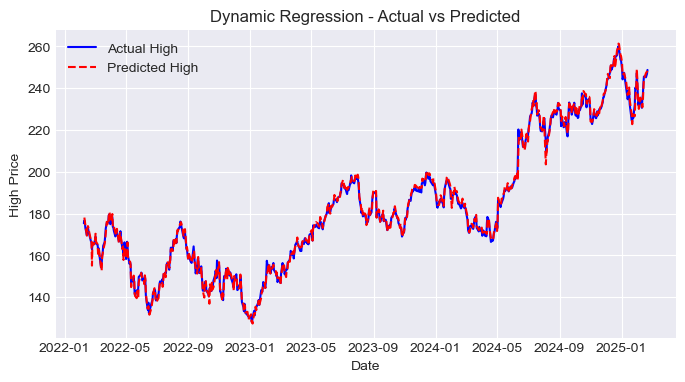

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(test_df["as_of_date"], test_df["high"], label="Actual High", color="blue")
plt.plot(test_df["as_of_date"].iloc[1:], preds, label="Predicted High", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("Dynamic Regression - Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

### xgboost

In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
train= df_ori.copy()

# 创建滞后特征
for lag in range(1, 5):  # 过去5天的特征
    train[f"high_lag{lag}"] = train["high"].shift(lag)

train["close_lag1"] = train["close"].shift(1)
train["low_lag1"] = train["low"].shift(1)
train["volume_lag1"] = train["volume"].shift(1)

# 处理数据
X = train.dropna().drop(columns=["as_of_date", "high","volume","low","close",'div_adj_factor'])  # 特征
print(X.columns)
y = train.dropna()["high"]  # 目标变量

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)

# 训练 XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# 预测
preds = xgb_model.predict(X_valid)


Index(['open', 'high_lag1', 'high_lag2', 'close_lag1', 'low_lag1',
       'volume_lag1'],
      dtype='object')


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 计算误差
mae = mean_absolute_error(y_valid, preds)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
mape = np.mean(np.abs((y_valid - preds) / y_valid)) * 100
r2 = r2_score(y_valid, preds)

# 输出评估指标
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

MAE: 14.89355031573278
RMSE: 25.916282824344407
MAPE: 6.76%
R² Score: 0.3109


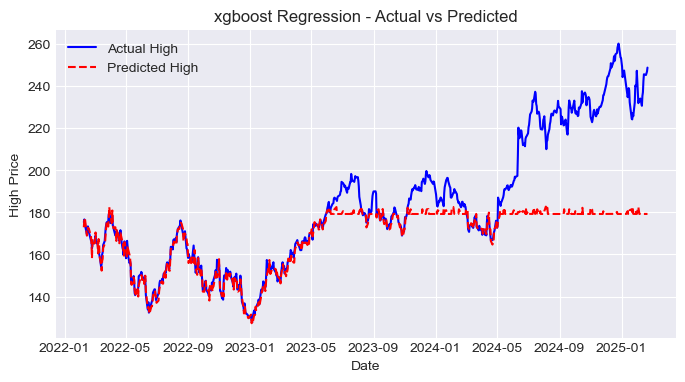

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(test_df["as_of_date"], y_valid, label="Actual High", color="blue")
plt.plot(test_df["as_of_date"], preds, label="Predicted High", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("xgboost Regression - Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

### RNN

In [35]:
data= df_ori.copy().drop(columns=['div_adj_factor','as_of_date'])
train_df, test_df = train_test_split(data,test_size=0.2)
time_steps = 10

def create_sequences(data, target_col, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)  # 过去 time_steps 个月的数据
        y.append(data.iloc[i+time_steps][target_col])  # 目标值
    return np.array(X), np.array(y)

# 重新生成 X_train 和 X_test
X_train, y_train = create_sequences(train_df, 'high', time_steps)
X_test, y_test = create_sequences(test_df, 'high', time_steps)

# 确保 X_train, X_test, y_train, y_test 都是 float32
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)  # 确保 y_train 是 2D
y_test = np.array(y_test, dtype=np.float32).reshape(-1, 1)

# 打印数据类型以确认
print(f"X_train dtype: {X_train.dtype}, shape: {X_train.shape}")
print(f"y_train dtype: {y_train.dtype}, shape: {y_train.shape}")
print(f"X_test dtype: {X_test.dtype}, shape: {X_test.shape}")
print(f"y_test dtype: {y_test.dtype}, shape: {y_test.shape}")

修正后 X_train shape: (3036, 10, 5)
X_train dtype: float32, shape: (3036, 10, 5)
y_train dtype: float32, shape: (3036, 1)
X_test dtype: float32, shape: (752, 10, 5)
y_test dtype: float32, shape: (752, 1)


In [42]:
X_train = np.nan_to_num(X_train)  # 把 NaN 转换为 0
y_train = np.nan_to_num(y_train)

X_test = np.nan_to_num(X_test)  # 把 NaN 转换为 0
y_test = np.nan_to_num(y_test)

In [43]:
model = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    SimpleRNN(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # 回归任务，输出 1 维
])

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


/opt/homebrew/Caskroom/miniforge/base/envs/city/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0863 - mae: 0.2350 - val_loss: 0.0743 - val_mae: 0.2329
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0752 - mae: 0.2292 - val_loss: 0.0748 - val_mae: 0.2410
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0721 - mae: 0.2268 - val_loss: 0.0758 - val_mae: 0.2185
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0760 - mae: 0.2344 - val_loss: 0.0750 - val_mae: 0.2211
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0700 - mae: 0.2242 - val_loss: 0.0746 - val_mae: 0.2208
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0736 - mae: 0.2316 - val_loss: 0.0737 - val_mae: 0.2318
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0714 - mae: 0.2302 - val_loss: 0.0739 - val_mae: 0.2267
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0717 - mae: 0.2295 - val_loss: 0.0738 - val_mae: 0.2298
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0714 - mae: 0.2298 - va

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 获取预测值
y_pred = model.predict(X_test)

# 计算误差
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE: 0.2363538106642343
RMSE: 0.28331412446923276
MAPE: 457.85%
R² Score: -0.0902


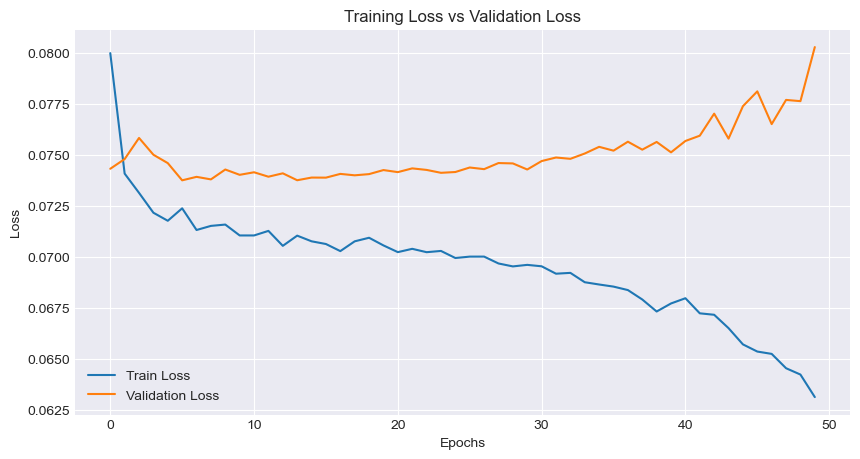

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

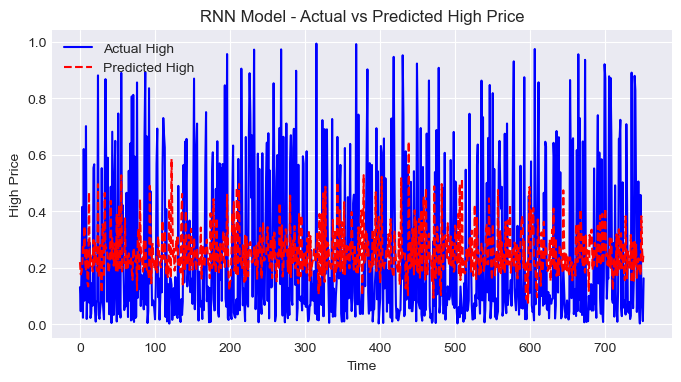

In [46]:
plt.figure(figsize=(8,4))
plt.plot(y_test, label="Actual High", color="blue")
plt.plot(y_pred, label="Predicted High", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("High Price")
plt.title("RNN Model - Actual vs Predicted High Price")
plt.legend()
plt.grid()
plt.show()

### LSTM

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trend_scaled = scaler.fit_transform(train_df[["high"]])

# 创建 LSTM 训练数据
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(trend_scaled, time_steps=10)

# 训练 LSTM 模型
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(10, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16)

# 预测
X_test, y_test = create_sequences(scaler.transform(test_df[["high"]]), time_steps=10)
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)  # 反归一化

Epoch 1/20


/opt/homebrew/Caskroom/miniforge/base/envs/city/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0825
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0698
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0715
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0712
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0680
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0708
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0701
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0685
Epoch 9/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0717
Epoch 10/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0727
Epoch 11/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0729
Epoch 12/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0681
Epoch 13/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0700
Epoch 14/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0714
Epoch 15/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0726


In [56]:
print(f"X_train dtype: {X_train.dtype}, shape: {X_train.shape}")
print(f"y_train dtype: {y_train.dtype}, shape: {y_train.shape}")

X_train dtype: float64, shape: (3036, 10, 1)
y_train dtype: float64, shape: (3036, 1)


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 计算评估指标
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mape = np.mean(np.abs((y_test - preds) / y_test)) * 100
r2 = r2_score(y_test, preds)

# 打印评估结果
print(f" MAE: {mae:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" MAPE: {mape:.2f}%")
print(f" R² Score: {r2:.4f}")

 MAE: 64.0530
 RMSE: 64.0572
 MAPE: 130566.04%
 R² Score: -55728.6283


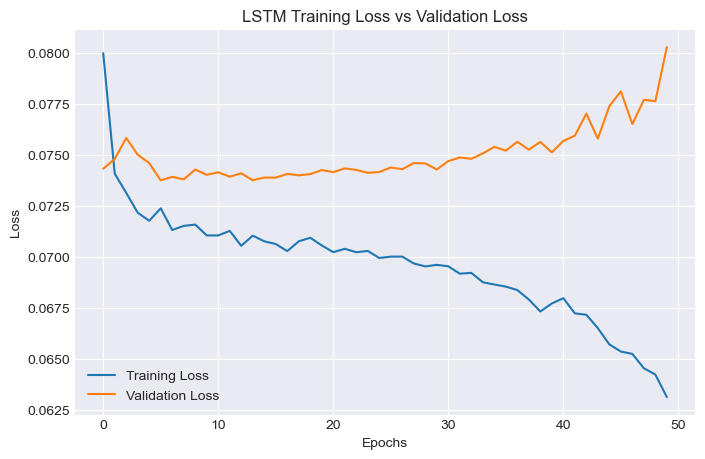

In [58]:
import matplotlib.pyplot as plt

# 绘制训练损失 vs. 验证损失曲线
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training Loss vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

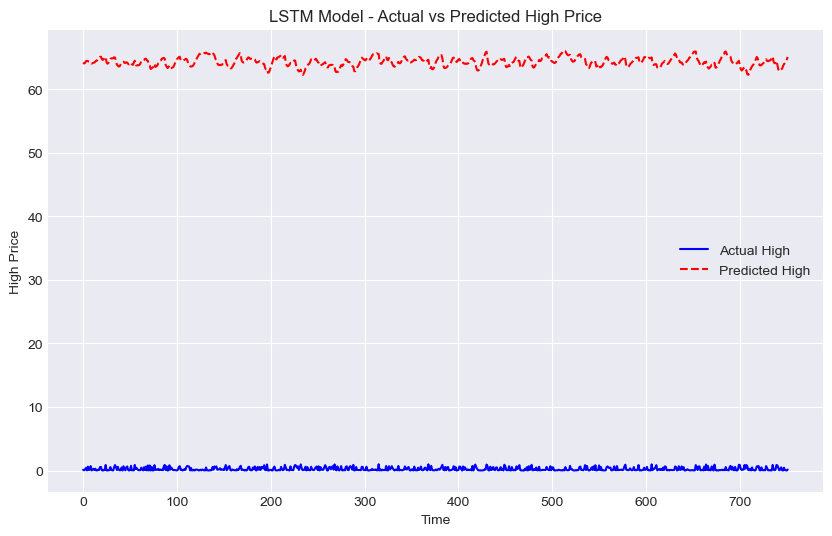

In [59]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label="Actual High", color="blue")
plt.plot(preds, label="Predicted High", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("High Price")
plt.title("LSTM Model - Actual vs Predicted High Price")
plt.legend()
plt.grid()
plt.show()